# Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
chipo=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

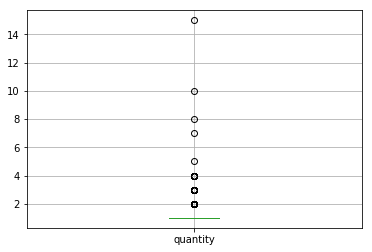

In [18]:
chipo.cov()
chipo.boxplot(column='quantity')

In [8]:
chipo.corr(method='pearson',min_periods=1)

,order_id,quantity
order_id,1.000000,0.032397
quantity,0.032397,1.000000


### Step 4. See the first 10 entries

In [101]:
chipo.head(10)
#chipo.boxplot
#chipo.hist

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [102]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


### Step 6. What is the number of columns in the dataset?

In [103]:
chipo.columns.size

5

### Step 7. Print the name of all the columns.

In [104]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [105]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most ordered item?

In [106]:
itemdata=chipo.groupby('item_name').describe()['quantity'][['max']]
itemmaxValue = chipo.groupby('item_name')['quantity'].max().max()
itemdata[itemdata['max']==itemmaxValue]

,max
item_name,
Chips and Fresh Tomato Salsa,15.0


### Step 10. How many items were ordered?

In [107]:
itemdata[itemdata['max']!=0].count()

max    50
dtype: int64

### Step 11. What was the most ordered item in the choice_description column?

In [108]:
choiceData=chipo.groupby('choice_description').describe()['quantity'][['max']]
choicemaxValue = chipo.groupby('choice_description')['quantity'].max().max()
choiceData[choiceData['max']==choicemaxValue]

,max
choice_description,
[Coke],4.0
"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Lettuce]]",4.0
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",4.0
[Sprite],4.0


### Step 12. How many items were orderd in total?

In [109]:
chipo['quantity'].sum()

4972

### Step 13. Turn the item price into a float

In [110]:
#priceData=chipo
#priceData['Amt']=priceData.item_price.apply(lambda x:x.replace('$',''))
#priceData.item_price = priceData.item_price.apply(lambda x:x.replace('$','')).astype(float)
chipo.item_price = chipo.item_price.apply(lambda x:x.replace('$','')).astype(float)
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


### Step 14. How much was the revenue for the period in the dataset?

In [111]:
chipo.item_price.sum()
#(chipo.item_price*chipo.quantity).sum()

34500.16

### Step 15. How many orders were made in the period?

In [118]:
chipo.order_id.max()

1834

### Step 16. What is the average amount per order?

In [119]:
chipo.groupby('order_id').describe()['item_price'][['mean']]
#chipo['Amt']=chipo.item_price*chipo.quantity
#chipo.groupby('order_id').describe()['Amt'][['mean']]

,mean
order_id,
1,2.890000
2,16.980000
3,6.335000
4,10.500000
5,6.850000
6,8.750000
7,7.850000
8,5.440000
9,5.335000


In [116]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


### Step 17. How many different items are sold?

In [57]:
itemdata.count()

max    50
dtype: int64